In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Set the seed for reproducibility
np.random.seed(123)

In [ ]:
# Creating dataframe containing information of articles

articles_df = pd.DataFrame({
    'title' : ['Fresh and Fit: A Deep Dive into their YouTube Channel and Influence on the Red Pill Community',
               'Rollo Tomassi and the Red Pill Philosophy: Exploring a Controversial Perspective on Gender Dynamics',
               'Vegan Breakfast Recipes',
               'Vegan Lunch Recipes',
               'How to shoulder press',
               'How to bench press',
               'Mindful Daily Routines: Bullet Journaling for Morning and Nighttime Rituals',
               'Getting Started with Bullet Journaling: A Beginners Guide',
               'Mastering the Art of Maimai: A guide to conquering complex note patterns',
               'Unleashing your inner dancer: A comprehensive guide to navigating complex step charts in Pump It Up'],
    'contributor' : ['Dai Jiu', 'Dai Jiu',
                     'Amritha','Amritha',
                     'Cheryl', 'Cheryl',
                     'Tasneem', 'Tasneem',
                     'Zandra', 'Zandra'],
    'isIndexed_before' : np.zeros(10).astype('int'), # by default, all articles will not be indexed yet,
    'isTreated' : np.zeros(10).astype('int')
})

articles_df

,title,contributor,isIndexed_before,isTreated
0,Fresh and Fit: A Deep Dive into their YouTube ...,Dai Jiu,0,0
1,Rollo Tomassi and the Red Pill Philosophy: Exp...,Dai Jiu,0,0
2,Vegan Breakfast Recipes,Amritha,0,0
3,Vegan Lunch Recipes,Amritha,0,0
4,How to shoulder press,Cheryl,0,0
5,How to bench press,Cheryl,0,0
6,Mindful Daily Routines: Bullet Journaling for ...,Tasneem,0,0
7,Getting Started with Bullet Journaling: A Begi...,Tasneem,0,0
8,Mastering the Art of Maimai: A guide to conque...,Zandra,0,0
9,Unleashing your inner dancer: A comprehensive ...,Zandra,0,0


## An explanation of the `articles_df` dataframe:
- `title` - refers to the title of the article
- `contributor` - refers to the author of the article. This column will be used as the gorups when doind paired random assignment subsequently.
- `isIndexed_before` - refers to the status of whether the article is indexed or not. If it is indexed, 1, else, 0. However, at the start of the experiment, all articles are not standardised yet.
- `isTreated` - We will use the column in the next set to determine whether an article is treated or not. If treated, 1, else, 0.

In [ ]:
# Implementation of paired randomization -- group by 'contributor' to ensure pairs are by the same author
grouped = articles_df.groupby('contributor')

np.random.seed(123)
# Randomly assign within pairs
for name, group in grouped:
    # Randomly choose one article from each pair to be indexed
    to_index = np.random.choice(group.index, size=1, replace=False)
    articles_df.loc[to_index, 'isTreated'] = 1

articles_df

,title,contributor,isIndexed_before,isTreated
0,Fresh and Fit: A Deep Dive into their YouTube ...,Dai Jiu,0,0
1,Rollo Tomassi and the Red Pill Philosophy: Exp...,Dai Jiu,0,1
2,Vegan Breakfast Recipes,Amritha,0,0
3,Vegan Lunch Recipes,Amritha,0,1
4,How to shoulder press,Cheryl,0,1
5,How to bench press,Cheryl,0,0
6,Mindful Daily Routines: Bullet Journaling for ...,Tasneem,0,0
7,Getting Started with Bullet Journaling: A Begi...,Tasneem,0,1
8,Mastering the Art of Maimai: A guide to conque...,Zandra,0,0
9,Unleashing your inner dancer: A comprehensive ...,Zandra,0,1


In [ ]:
# create a new column to show whether the articles have been indexed after the experiment is carried out or not.
# Unfortunately, due to our poor luck, all our articles were not indexed :(

articles_df['isIndexed_after'] = np.zeros(10).astype('int')

articles_df

,title,contributor,isIndexed_before,isTreated,isIndexed_after
0,Fresh and Fit: A Deep Dive into their YouTube ...,Dai Jiu,0,0,0
1,Rollo Tomassi and the Red Pill Philosophy: Exp...,Dai Jiu,0,1,0
2,Vegan Breakfast Recipes,Amritha,0,0,0
3,Vegan Lunch Recipes,Amritha,0,1,0
4,How to shoulder press,Cheryl,0,1,0
5,How to bench press,Cheryl,0,0,0
6,Mindful Daily Routines: Bullet Journaling for ...,Tasneem,0,0,0
7,Getting Started with Bullet Journaling: A Begi...,Tasneem,0,1,0
8,Mastering the Art of Maimai: A guide to conque...,Zandra,0,0,0
9,Unleashing your inner dancer: A comprehensive ...,Zandra,0,1,0


# Adding predictors to perform machine learning later
As we wish to investigate what factors, apart from our treatment, can affect whether the blogs are indexed or not, we will add relevant predictors to the `articles_df` dataframe. These predictors include:
- total word count
- published time (to calculate the duration since the blog was posted)
- image count
- on page SEO score (derived from UberSuggest)

In [ ]:
from datetime import datetime
pd.Timestamp.now()

Timestamp('2023-11-10 01:04:32.776209')

In [ ]:
# adding relevant predictors
articles_df_copy = articles_df.copy()

articles_df_copy['totalWordCount'] = [516,547,608,630,469,493,587,565,645,517]
articles_df_copy['publishedTime'] = ['26-10-2023 16:58', '26-10-2023 16:58', '26-10-2023 19:27', '26-10-2023 19:27', '26-10-2023 12:14', '26-10-2023 11:59',
                                     '26-10-2023 20:38', '26-10-2023 20:38', '26-10-2023 12:37', '26-10-2023 12:40']
articles_df_copy['publishedTime'] = pd.to_datetime(articles_df_copy['publishedTime'])
articles_df_copy['imageCount'] = [0,0,3,3,3,3,0,0,1,1]
articles_df_copy['onPageSEOScore'] = [70,70,69,69,64,64,77,77,66,66]

# calculate number of hours from publishedTime till current time
# But we have to take a snapshot in time -- cannot use pd.Timestamp.now(). Let's just fix it at 8-11-2023 12:00
current_date = pd.to_datetime('2023-11-08 12:00')
articles_df_copy['hoursSincePublished'] = (current_date - articles_df_copy['publishedTime']).dt.total_seconds() / 3600

# finally, we can drop the columns that are not required for hypo testing or ML
articles_df_copy = articles_df_copy.drop(['contributor', 'publishedTime'], axis = 1)

articles_df_copy

,title,isIndexed_before,isTreated,isIndexed_after,totalWordCount,imageCount,onPageSEOScore,hoursSincePublished
0,Fresh and Fit: A Deep Dive into their YouTube ...,0,0,0,516,0,70,307.033333
1,Rollo Tomassi and the Red Pill Philosophy: Exp...,0,1,0,547,0,70,307.033333
2,Vegan Breakfast Recipes,0,0,0,608,3,69,304.550000
3,Vegan Lunch Recipes,0,1,0,630,3,69,304.550000
4,How to shoulder press,0,1,0,469,3,64,311.766667
5,How to bench press,0,0,0,493,3,64,312.016667
6,Mindful Daily Routines: Bullet Journaling for ...,0,0,0,587,0,77,303.366667
7,Getting Started with Bullet Journaling: A Begi...,0,1,0,565,0,77,303.366667
8,Mastering the Art of Maimai: A guide to conque...,0,0,0,645,1,66,311.383333
9,Unleashing your inner dancer: A comprehensive ...,0,1,0,517,1,66,311.333333


# Adding dummy data to demonstrate proof of concept
Since all blogs were not indexed before and after the experiment, this resulted in `isIndexed_before` and `isIndexed_after` being populated entirely with 0's.
<br> <br>
For the purpose of this assignment, conducting any sort of hypothesis test or machine learning on such a dataset will yield results that are not meaningful, since we only have one class present in our target, which is 0 (not indexed).
<br><br>
Thus, we decided to add more rows of dummy data. This dummy data represents 'blogs' whose values of `isIndexed_before`, `isIndexed_after` and `isTreated` are randomised, so as to generate some 1's in the target variable.

In [ ]:
# First, we have to differentiate between our blogs (the real data) and the dummy blogs.
dummy_df = articles_df_copy.copy()

# add a column `isDummy`
dummy_df['isDummy'] = 0

In [ ]:
import random
from random import randrange
import math

# Function to generate random rows for the DataFrame with the amended condition
def generate_random_rows(num_rows):
    # Random alphabetical titles
    titles = [''.join(np.random.choice(list('ABCDEFGHIJKLMNOPQRSTUVWXYZ'), size=np.random.randint(1, 10)))
              for _ in range(num_rows)]

    # Random 0 or 1 values for isIndexed_before and isTreated
    isIndexed_before = np.zeros(num_rows, dtype=int)
    isTreated = np.random.choice([0, 1], size=num_rows)

    # Ensure that if 'isIndexed_before' is 1, then 'isIndexed_after' is also 1
    isIndexed_after = np.array([1 if isIndexed_before[i] == 1 else np.random.choice([0, 1]) for i in range(num_rows)])

    # All ones for isDummy
    isDummy = np.ones(num_rows, dtype=int)

    # Random values for totalWordCount, imageCount, onPageSEOScore
    totalWordCount = [randrange(400, 800) for i in range(num_rows)]
    imageCount = np.random.choice(a=10, size=num_rows)
    onPageSEOScore = np.random.choice(a=100, size=num_rows)

    # Random values for hoursSincePublished. Min = published at 26-10-2023 23:59, Max = 26-10-2023 00:01
    current_date = pd.to_datetime('2023-11-08 12:00')
    min_date = pd.to_datetime('2023-10-26 23:59')
    max_date = pd.to_datetime('2023-10-26 00:01')
    minDurat = (current_date - min_date).total_seconds() / 3600
    maxDurat = (current_date - max_date).total_seconds() / 3600

    hoursSincePublished = [randrange(math.floor(minDurat), math.floor(maxDurat)) for i in range(num_rows)]

    # New DataFrame with generated rows
    new_rows = pd.DataFrame({
        'title': titles,
        'isIndexed_before': isIndexed_before,
        'isTreated': isTreated,
        'isIndexed_after': isIndexed_after,
        'isDummy': isDummy,
        'totalWordCount': totalWordCount,
        'imageCount' : imageCount,
        'onPageSEOScore' : onPageSEOScore,
        'hoursSincePublished' : hoursSincePublished
    })

    return new_rows

In [ ]:
# Generate 100 new random rows of data to ensure a sufficiently large sample size for ML and hypo testing
np.random.seed(123)
new_data = generate_random_rows(100)

# Append the new rows to the original DataFrame
dummy_df = pd.concat([dummy_df, new_data])

In [ ]:
dummy_df.tail()

,title,isIndexed_before,isTreated,isIndexed_after,totalWordCount,imageCount,onPageSEOScore,hoursSincePublished,isDummy
95,F,0,1,1,523,7,36,322.0,1
96,GYYEEAR,0,1,1,422,4,38,321.0,1
97,H,0,0,0,642,4,3,317.0,1
98,UOXSDF,0,1,1,420,7,48,319.0,1
99,UCNWJX,0,0,1,504,6,36,319.0,1


# Perform Fisher's Exact Test is used to determine if there are nonrandom associations between two categorical variables

In [ ]:
from scipy.stats import fisher_exact

# How the contingency table looks like
# |                 | Indexed (1) | NotIndexed (0) |
# | Treated (1)     | a           | b              |
# | Not treated (0) | c           | d              |

# Replace a, b, c, d with the actual counts from my data
a = len(dummy_df[(dummy_df.isTreated == 1) & (dummy_df.isIndexed_after == 1)])
b = len(dummy_df[(dummy_df.isTreated == 1) & (dummy_df.isIndexed_after == 0)])
c = len(dummy_df[(dummy_df.isTreated == 0) & (dummy_df.isIndexed_after == 1)])
d = len(dummy_df[(dummy_df.isTreated == 0) & (dummy_df.isIndexed_after == 0)])
contingency_table = [[a, b], [c, d]]

# Perform Fisher's Exact Test
odds_ratio, p_value = fisher_exact(contingency_table)

# Interpret the results
if p_value < 0.05:
    print("There is a statistically significant association between the treatment and the outcome.")
else:
    print("There is no statistically significant association between the treatment and the outcome.")

print(p_value)

# the outcome refers to whether the blog is indexed or not (after the experiment)

There is no statistically significant association between the treatment and the outcome.
0.19427066687162148


# Machine Learning
Algorithms that we will use:
- Random Forest -- If the data is noisy, bagging might be preferable since boosting could focus too much on the noise.


## Random Forest

In [ ]:
import statsmodels.api as sm # recommended version: 0.13.0
from statsmodels.miscmodels.ordinal_model import OrderedModel

import xgboost as xgb # recommended version: 1.5.0
from xgboost import plot_importance

from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
from itertools import chain

In [ ]:
# Split into train test first
from sklearn.model_selection import train_test_split

dummy_df_copy = dummy_df.copy()

X = dummy_df_copy[['isIndexed_before',	'isTreated',	'totalWordCount',	'imageCount',	'onPageSEOScore',	'hoursSincePublished']]
y = dummy_df_copy['isIndexed_after']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
# Check for NaNs in the data
print(dummy_df_copy.isnull().sum())

title                  0
isIndexed_before       0
isTreated              0
isIndexed_after        0
totalWordCount         0
imageCount             0
onPageSEOScore         0
hoursSincePublished    0
isDummy                0
dtype: int64


In [ ]:
# fit the model and make predictions

rf_model =  RandomForestClassifier(random_state=123).fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

In [ ]:
# print rmse

print(np.sqrt(mean_squared_error(y_test, rf_pred)))

0.4714045207910317


F1 score is 0.8512
Confusion Matrix : 
 [[ 23  22]
 [ 14 103]]


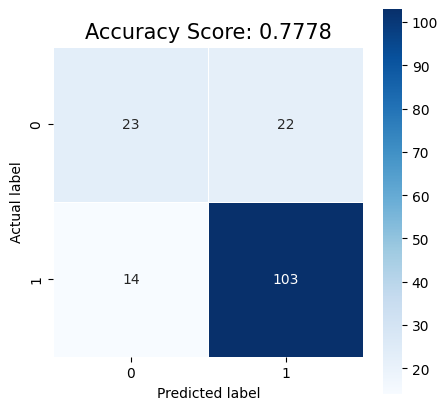

In [ ]:
from sklearn.metrics import (confusion_matrix, f1_score, accuracy_score)
import seaborn as sns

f1 = '{0:.4f}'.format(f1_score(y_test, rf_pred))
print("F1 score is " + str(f1))

# confusion matrix
cm = confusion_matrix(y_test, rf_pred)
print ("Confusion Matrix : \n", cm)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0:.4f}'.format(accuracy_score(y_test, rf_pred))
plt.title(all_sample_title, size = 15);

## Feature importance

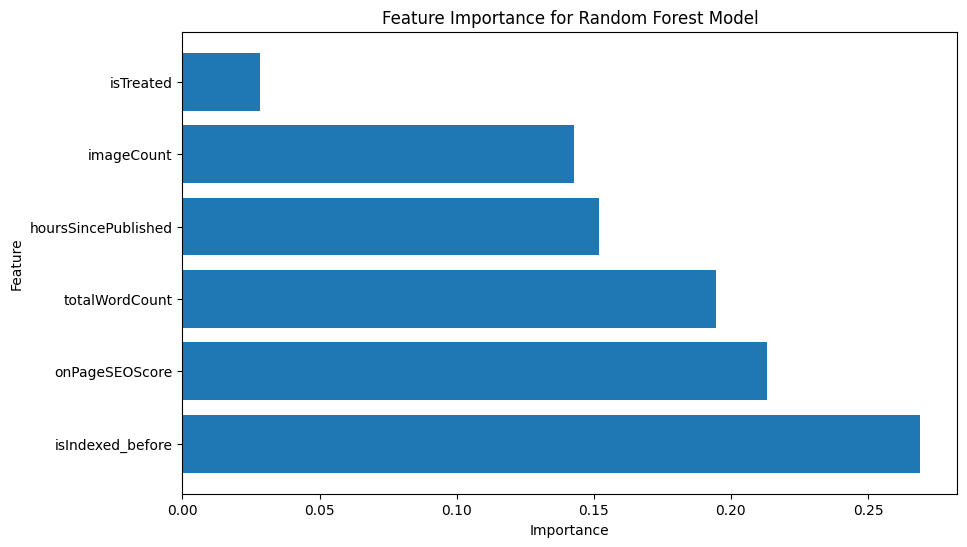

In [ ]:
import matplotlib.pyplot as plt

# Get the names of your feature columns (assuming your data is in a DataFrame)
feature_names = X.columns

importances = rf_model.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Random Forest Model')
plt.show()